# import libary

In [1]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical


#import dataset


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

# show dataset

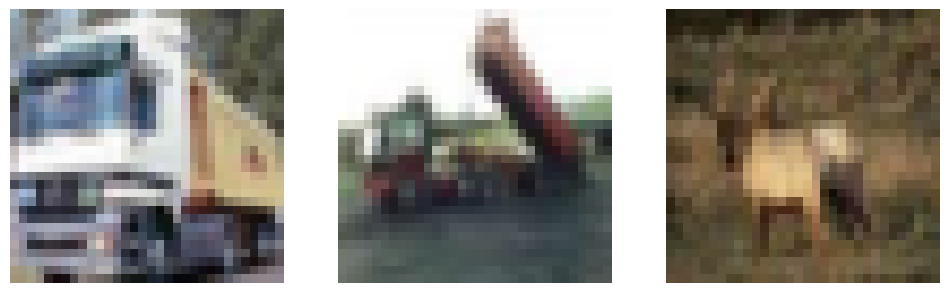

In [3]:

# انتخاب سه عکس از x_train
images = x_train[1:4]

# ایجاد یک figure با سه زیر نمودار (subplots)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# رسم هر عکس در یکی از زیر نمودارها
for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.axis('off')  # برای حذف محورهای عددی

plt.show()

# normalize


In [4]:
x_train, x_test = x_train/255.0, x_test/255.0

#model

In [5]:
model = keras.models.Sequential([
    keras.layers.Conv2D(60, 5, activation="relu",
                         padding="same", input_shape=[32, 32 ,3]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(100, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(200, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


In [7]:
carfit=model.fit(x_train, y_train, epochs=10, validation_split=0.15)

Epoch 1/10
1329/1329 [==============================] - 16s 7ms/step - loss: 1.9030 - accuracy: 0.2794 - val_loss: 1.5174 - val_accuracy: 0.4509
Epoch 2/10
1329/1329 [==============================] - 8s 6ms/step - loss: 1.5053 - accuracy: 0.4492 - val_loss: 1.2808 - val_accuracy: 0.5472
Epoch 3/10
1329/1329 [==============================] - 9s 7ms/step - loss: 1.3259 - accuracy: 0.5242 - val_loss: 1.1653 - val_accuracy: 0.5893
Epoch 4/10
1329/1329 [==============================] - 9s 6ms/step - loss: 1.2010 - accuracy: 0.5766 - val_loss: 1.1639 - val_accuracy: 0.5987
Epoch 5/10
1329/1329 [==============================] - 8s 6ms/step - loss: 1.1169 - accuracy: 0.6058 - val_loss: 1.0121 - val_accuracy: 0.6460
Epoch 6/10
1329/1329 [==============================] - 9s 7ms/step - loss: 1.0412 - accuracy: 0.6378 - val_loss: 0.9373 - val_accuracy: 0.6765
Epoch 7/10
1329/1329 [==============================] - 9s 7ms/step - loss: 0.9747 - accuracy: 0.6623 - val_loss: 0.9428 - val_accuracy

# save and load model

In [8]:
model.save('carfit_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# carfit= load_model('carfit_1.h5')

In [9]:
model.summary()
# carfit.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 60)        4560      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 60)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 100)       54100     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 100)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 200)         180200    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 200)         0

# Add new image for model testing

array([[[255, 255, 255],
        [255, 255, 255],
        [245, 245, 245],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[245, 245, 245],
        [247, 247, 247],
        [252, 252, 252],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[233, 233, 233],
        [245, 245, 245],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       ...,

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]]], dtype=uint8)
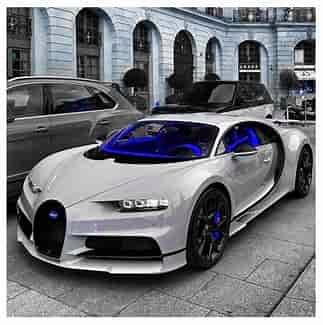

In [10]:
img=cv2.imread('th.jpg')
img

In [11]:
img.shape

(325, 323, 3)

# convert resized_image

In [13]:
resized_image = cv2.resize(img, (32, 32))
resized_image = resized_image.reshape(1, 32, 32, 3)/255   # /255
resized_image.shape

(1, 32, 32, 3)

# predict image

In [14]:
# y_prob = carfit.predict(resized_image)
y_prob = model.predict(resized_image)
y_prob

1/1 [==============================] - 0s 350ms/step


array([[2.9294456e-10, 9.9975270e-01, 1.1576262e-13, 4.6768074e-13,
        4.3506427e-20, 2.9685295e-15, 5.4394356e-10, 3.6443067e-18,
        2.9800947e-07, 2.4699530e-04]], dtype=float32)

# predict image (model xception)


In [15]:
xception = keras.applications.Xception()
resized_image = img.reshape(1, 325, 323, 3)/255   # /255
# resized_image.shape
resized_image_new = tf.image.resize(resized_image, [299, 299])
# a=resized_image_new/255
# resized_image_new.shape
y_prob_1 = xception.predict(resized_image_new)
# y_prob_1
keras.applications.xception.decode_predictions(y_prob_1, top=5)

35363/35363 [==============================] - 0s 0us/step


[[('n04285008', 'sports_car', 0.7648045),
  ('n02974003', 'car_wheel', 0.04777911),
  ('n03100240', 'convertible', 0.0131950155),
  ('n04037443', 'racer', 0.0089197),
  ('n03670208', 'limousine', 0.005515232)]]

# Prediction of test model dataset

In [ ]:
resized_image_test = x_test.reshape(10000, 32, 32, 1)

resized_image_test.shape

In [16]:
resized_image[:100].shape

(1, 325, 323, 3)

In [17]:
x_test.shape

(10000, 32, 32, 3)

In [18]:
y_pred_test = model.predict(x_test)


313/313 [==============================] - 1s 3ms/step


# confusion_matrix

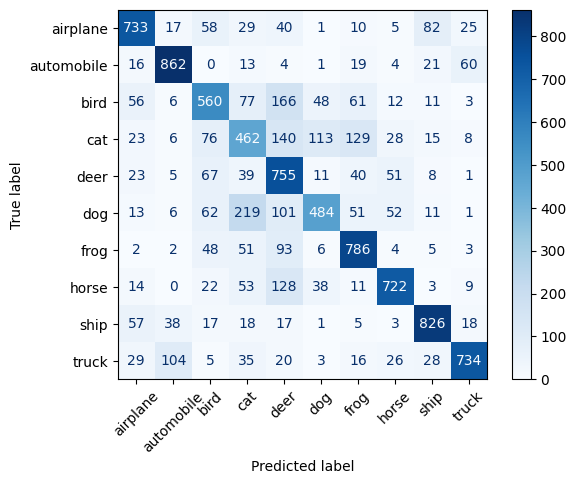

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# پیش‌بینی برچسب‌ها برای داده‌های تست
# y_pred = model.predict(x_test_gray)
y_pred_classes = np.argmax(y_pred_test, axis=1)

# محاسبه ماتریس confusion
cm = confusion_matrix(y_test, y_pred_classes)

# نمایش ماتریس confusion
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.show()

#confusion_matrix (model xception)

313/313 [==============================] - 4s 8ms/step


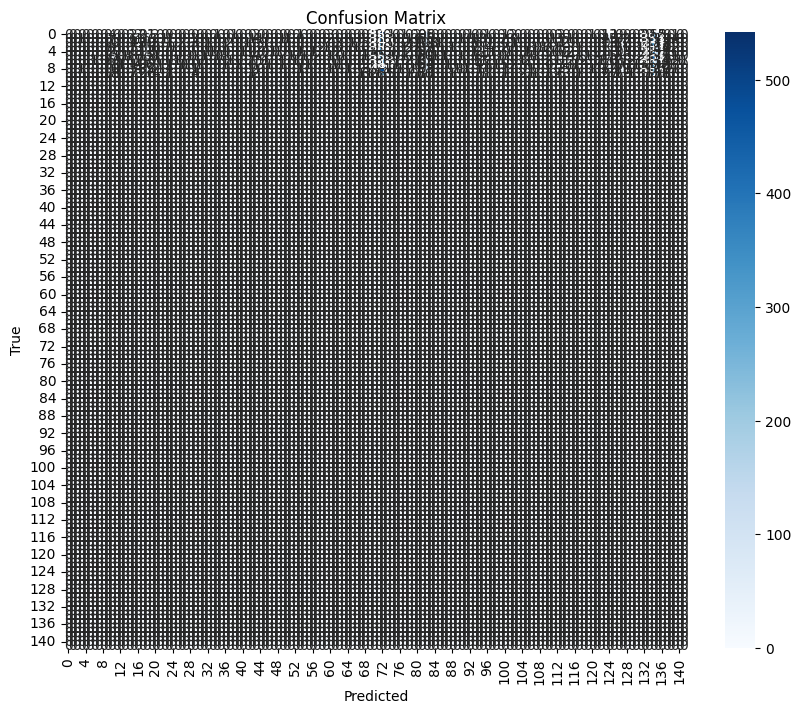

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       1.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000
          21       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         0
          41       0.00      0.00      0.00         0
          43       0.00      0.00      0.00         0
          50       0.00      0.00      0.00         0
          52       0.00      0.00      0.00         0
          56       0.00      0.00      0.00         0
          58       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [23]:
y_prob_2 = xception.predict(x_test)

y_pred_classes = np.argmax(y_prob_2, axis=1)
y_true = y_test  # فرض می‌کنیم y_test دارای لیبل‌های صحیح است
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# محاسبه ماتریس اغتشاش
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# نمایش ماتریس اغتشاش
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# چاپ گزارش طبقه‌بندی
print(classification_report(y_true, y_pred_classes))